In [8]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread, imsave

np.random.seed(1)

In [9]:
k = 4
H,W = 300, 300
P = np.random.uniform(size=(k,3))
Z_init = np.random.choice(np.arange(1,k+1), size=(H,W))
Z = Z_init.copy()
Z_gen = Z_init.copy()
Img = np.zeros((H,W,3))

In [10]:
n_iter = 10000000
r = 1.5
for _ in range(1,n_iter):
    y = np.random.choice(np.arange(300))
    x = np.random.choice(np.arange(300))
    zprime = np.random.choice(np.arange(1,k+1))
    sum_prev = 0;
    sum_new = 0;
    for i in range(-1,2):
        for j in range(-1,2):
            col, row = y-i, x-j
            if i==0 and j==0:
                continue
            if col<0 or col>H-1:
                continue
            if row<0 or row>W-1:
                continue
                
            sum_prev += Z[y,x] == Z[col, row]
            sum_new += zprime == Z[col, row]
    
    alpha = np.exp(r*sum_new) / np.exp(r*sum_prev)
    if np.random.uniform() < alpha:
        Z_gen[y,x] = zprime
    else:
        Z_gen[y,x] = Z[y,x]
        
    Z = Z_gen

In [11]:
for c in range(k):
    Img[Z_gen==c+1,...] = P[c,...]

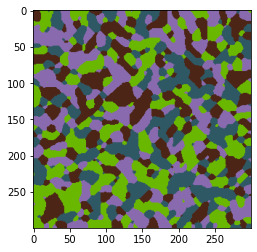

In [12]:
plt.imshow(Img)